##라이브러리 및 데이터 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/2023-1 과제/[0131][HW]_LinearRegression_and_SVM/econ.csv')
data = data[data['income'] > 0]
data

,gender,education,firmsize,worktype,workstart,age,union,incometype,income
183,1,0,1,1,202205,63,1,4,200
184,1,0,1,2,201201,73,1,4,100
185,1,0,1,2,201307,57,1,2,200
186,1,0,1,2,201612,79,1,4,180
187,1,0,1,2,201706,77,1,1,27
...,...,...,...,...,...,...,...,...,...
57379,2,7,6,1,202202,44,3,3,320
57380,2,7,6,1,202203,55,1,1,105
57381,2,7,6,2,201509,33,2,1,167
57382,2,7,6,2,201809,35,3,1,120


##전처리

In [ ]:
#성별

data['gender'] = (data['gender']==1)

In [ ]:
#정규직 여부

data['regular'] = (data['worktype'] == 1)

In [ ]:
#노조 보호 여부

data['union'] = (data['union'] == 2) | (data['union'] == 3)

In [ ]:
#경력

data['workstart'] = data['workstart'].astype('str')
data['workstart'] = [x[:4] for x in data['workstart']]
data['workstart'] = data['workstart'].astype('int')
data['exp'] = 2022 - data['workstart']
data = data.drop(columns = 'workstart')  

In [ ]:
data = data[['gender',	'education',	'firmsize',	'regular',	'exp',	'age',	'union',	'income']]
data

,gender,education,firmsize,regular,exp,age,union,income
183,True,0,1,True,0,63,False,200
184,True,0,1,False,10,73,False,100
185,True,0,1,False,9,57,False,200
186,True,0,1,False,6,79,False,180
187,True,0,1,False,5,77,False,27
...,...,...,...,...,...,...,...,...
57379,False,7,6,True,0,44,True,320
57380,False,7,6,True,0,55,False,105
57381,False,7,6,False,7,33,True,167
57382,False,7,6,False,4,35,True,120


In [ ]:
data = data.astype('int')

##기술분석을 통한 독립변수 추리기


In [ ]:
data.corr()

,gender,education,firmsize,regular,exp,age,union,income
gender,1.000000,0.146509,0.127893,0.121679,0.148838,-0.022108,0.041276,0.339455
education,0.146509,1.000000,0.298782,0.349818,0.198338,-0.512357,0.183663,0.415458
firmsize,0.127893,0.298782,1.000000,0.381864,0.318088,-0.176567,0.324769,0.427575
regular,0.121679,0.349818,0.381864,1.000000,0.366791,-0.254407,0.105532,0.459724
exp,0.148838,0.198338,0.318088,0.366791,1.000000,0.111148,0.163818,0.512366
age,-0.022108,-0.512357,-0.176567,-0.254407,0.111148,1.000000,-0.060278,-0.144177
union,0.041276,0.183663,0.324769,0.105532,0.163818,-0.060278,1.000000,0.200468
income,0.339455,0.415458,0.427575,0.459724,0.512366,-0.144177,0.200468,1.000000


#정규직 여부 로짓 회귀분석

##데이터셋 분리

In [ ]:
X = data.drop(columns = 'regular')
y = data['regular']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(20276, 7) (5070, 7) (20276,) (5070,)


##모델 검증

In [ ]:
from sklearn.model_selection import cross_val_score

# 로지스틱회귀의 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression

In [ ]:
# 모델 객체 선언, 이 때 위에서 구한 최적의 hyper-parameter를 넣어준다.
logit = LogisticRegression() 

# 모델 학습; 이번에는 학습데이터를 학습&검증데이터로 나누는 것이 아닌
# 학습데이터로 학습하고, 테스트데이터로 테스트를 한다.
logit.fit(train_X, train_y)

print("R square score for logit model : {:.5f}".format(r2_score(test_y, logit.predict(test_X))))

# RMSE; mean_squared_error
print("RMSE for logit model : {:.5f}".format(np.sqrt(mean_squared_error(test_y, logit.predict(test_X)))))

R square score for logit model : 0.25519
RMSE for logit model : 0.39549


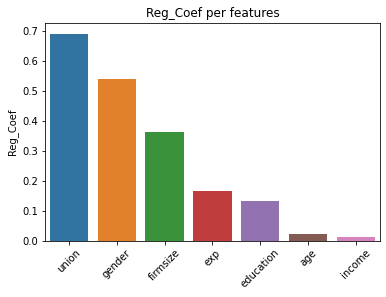

In [ ]:
# 표준화한 회귀계수의 절댓값
coef = logit.coef_
coef_abs = np.abs(coef)[0]

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = list(X.head(1).columns[idx])

# top10
sns.barplot(name, coef_abs)
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features')
plt.show()

##스케일링

###minmax 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_data = data.drop(columns = ['gender', 'regular', 'union'])
remaining_data = data[['gender', 'regular', 'union']]

scaler = MinMaxScaler()
scaler.fit(scale_data)
trans_data = scaler.transform(scale_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=scale_data.columns)
trans_data_df = pd.concat([trans_data_df.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
trans_data_df # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,education,firmsize,exp,age,income,gender,regular,union
0,0.0,0.0,0.000000,0.602564,0.056334,1,1,0
1,0.0,0.0,0.196078,0.730769,0.027738,1,0,0
2,0.0,0.0,0.176471,0.525641,0.056334,1,0,0
3,0.0,0.0,0.117647,0.807692,0.050615,1,0,0
4,0.0,0.0,0.098039,0.782051,0.006863,1,0,0
...,...,...,...,...,...,...,...,...
25341,1.0,1.0,0.000000,0.358974,0.090649,0,1,1
25342,1.0,1.0,0.000000,0.500000,0.029168,0,1,0
25343,1.0,1.0,0.137255,0.217949,0.046897,0,0,1
25344,1.0,1.0,0.078431,0.243590,0.033457,0,0,1


In [ ]:
X = trans_data_df.drop(columns = 'regular')
y = trans_data_df['regular']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(20276, 7) (5070, 7) (20276,) (5070,)


In [ ]:
# 모델 객체 선언, 이 때 위에서 구한 최적의 hyper-parameter를 넣어준다.
logit = LogisticRegression() 

# 모델 학습; 이번에는 학습데이터를 학습&검증데이터로 나누는 것이 아닌
# 학습데이터로 학습하고, 테스트데이터로 테스트를 한다.
logit.fit(train_X, train_y)

print("R square score for logit model : {:.5f}".format(r2_score(test_y, logit.predict(test_X))))

# RMSE; mean_squared_error
print("RMSE for logit model : {:.5f}".format(np.sqrt(mean_squared_error(test_y, logit.predict(test_X)))))

R square score for logit model : 0.22513
RMSE for logit model : 0.40339


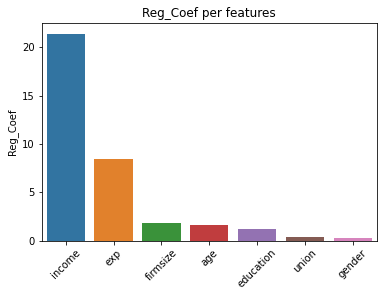

In [ ]:
# 표준화한 회귀계수의 절댓값
coef = logit.coef_
coef_abs = np.abs(coef)[0]

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = list(X.head(1).columns[idx])

# top10
sns.barplot(name, coef_abs)
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features')
plt.show()

In [ ]:
coef

array([[ 1.23882773,  1.87176668,  8.45801221, -1.64243982, 21.43994294,
        -0.24125962, -0.37492981]])

###standard 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_data = data.drop(columns = ['gender', 'regular', 'union'])
remaining_data = data[['gender', 'regular', 'union']]

scaler = StandardScaler()
scaler.fit(scale_data)
trans_data = scaler.transform(scale_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=scale_data.columns)
trans_data_df = pd.concat([trans_data_df.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
trans_data_df # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,education,firmsize,exp,age,income,gender,regular,union
0,-2.779516,-1.367150,-0.743113,1.050736,-0.416671,1,1,0
1,-2.779516,-1.367150,0.480174,1.725746,-0.969975,1,0,0
2,-2.779516,-1.367150,0.357845,0.645731,-0.416671,1,0,0
3,-2.779516,-1.367150,-0.009141,2.130751,-0.527332,1,0,0
4,-2.779516,-1.367150,-0.131470,1.995750,-1.373888,1,0,0
...,...,...,...,...,...,...,...,...
25341,2.340794,1.741972,-0.743113,-0.231782,0.247295,0,1,1
25342,2.340794,1.741972,-0.743113,0.510729,-0.942310,0,1,0
25343,2.340794,1.741972,0.113188,-0.974292,-0.599261,0,0,1
25344,2.340794,1.741972,-0.253799,-0.839290,-0.859315,0,0,1


In [ ]:
X = trans_data_df.drop(columns = 'regular')
y = trans_data_df['regular']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(20276, 7) (5070, 7) (20276,) (5070,)


In [ ]:
# 모델 객체 선언, 이 때 위에서 구한 최적의 hyper-parameter를 넣어준다.
logit = LogisticRegression() 

# 모델 학습; 이번에는 학습데이터를 학습&검증데이터로 나누는 것이 아닌
# 학습데이터로 학습하고, 테스트데이터로 테스트를 한다.
logit.fit(train_X, train_y)

print("R square score for logit model : {:.5f}".format(r2_score(test_y, logit.predict(test_X))))

# RMSE; mean_squared_error
print("RMSE for logit model : {:.5f}".format(np.sqrt(mean_squared_error(test_y, logit.predict(test_X)))))

R square score for logit model : 0.25989
RMSE for logit model : 0.39424


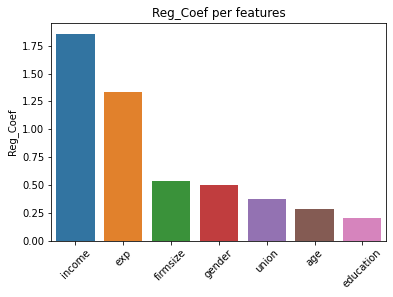

In [ ]:
# 표준화한 회귀계수의 절댓값
coef = logit.coef_
coef_abs = np.abs(coef)[0]

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = list(X.head(1).columns[idx])

# top10
sns.barplot(name, coef_abs)
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

print("recall :", recall_score(test_y,logit.predict(test_X)))
print("precision :", precision_score(test_y,logit.predict(test_X)))
print("f1_score :", f1_score(test_y,logit.predict(test_X)))

recall : 0.924204001127078
precision : 0.8633851013424585
f1_score : 0.8927599346761023


#정규직 여부 SVM

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_data = data.drop(columns = ['gender', 'regular', 'union'])
remaining_data = data[['gender', 'regular', 'union']]

scaler = StandardScaler()
scaler.fit(scale_data)
trans_data = scaler.transform(scale_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=scale_data.columns)
trans_data_df = pd.concat([trans_data_df.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
trans_data_df # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,education,firmsize,exp,age,income,gender,regular,union
0,-2.779516,-1.367150,-0.743113,1.050736,-0.416671,1,1,0
1,-2.779516,-1.367150,0.480174,1.725746,-0.969975,1,0,0
2,-2.779516,-1.367150,0.357845,0.645731,-0.416671,1,0,0
3,-2.779516,-1.367150,-0.009141,2.130751,-0.527332,1,0,0
4,-2.779516,-1.367150,-0.131470,1.995750,-1.373888,1,0,0
...,...,...,...,...,...,...,...,...
25341,2.340794,1.741972,-0.743113,-0.231782,0.247295,0,1,1
25342,2.340794,1.741972,-0.743113,0.510729,-0.942310,0,1,0
25343,2.340794,1.741972,0.113188,-0.974292,-0.599261,0,0,1
25344,2.340794,1.741972,-0.253799,-0.839290,-0.859315,0,0,1


In [ ]:
X = trans_data_df.drop(columns = 'regular')
y = trans_data_df['regular']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(20276, 7) (5070, 7) (20276,) (5070,)


In [ ]:
# hyper-parameter의 종류가 2개(kernel, C)임으로, 이전에 사용한 cross_val_score를 이용하면
# 2개의 반복문을 사용해야한다.
# 따라서 보다 사용하기 쉬운 'GridSearchCV()'를 사용하자.
from sklearn.model_selection import GridSearchCV

# 객체 선언
from sklearn.svm import SVC # SVC = SVM + Classification vs SVR = SVM + Regression
model_svm = SVC()

# pca후의 train 데이터에 대해서 학습진행
model_svm.fit(train_X, train_y)

# HyperParameter 후보군
parameters={'kernel':['rbf','linear','poly'],
            'C':[0.5,1.5,10],
            'random_state':[1]}

# HyperParameter를 Tuning
model_svm=GridSearchCV(estimator=model_svm, param_grid=parameters,
                       scoring='recall', cv=10, refit=True)

# 객체는 이전에 'refit=True'에 의해 생성되었기에, 바로 train 데이터에 대한 학습을 진행하면 된다.
model_svm.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1.5, 10],
                         'kernel': ['rbf', 'linear', 'poly'],
                         'random_state': [1]},
             scoring='recall')

In [ ]:
model_svm.best_params_

{'C': 0.5, 'kernel': 'poly', 'random_state': 1}

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

print("recall :", recall_score(test_y,model_svm.predict(test_X)))
print("precision :", precision_score(test_y,model_svm.predict(test_X)))
print("f1_score :", f1_score(test_y,model_svm.predict(test_X)))

recall : 0.9574528036066497
precision : 0.8454839512316497
f1_score : 0.8979915433403806
